## Тестовое задание и CV
Борисенко Геннадий Валерьевич, 29 лет

## CV

1. Что такое свёртка?

Свёртка — это математическая операция, которая используется для обработки сигналов и изображений. В контексте нейронных сетей, особенно в сверточных нейронных сетях (CNN), свёртка применяется для извлечения признаков из входных данных. Свёртка позволяет выявлять локальные зависимости и пространственные структуры, применяя фильтры (ядра свёртки) к входным данным.

Типы свёрток:
- Стандартная свёртка: Применение фильтра к изображению для получения карты признаков.
- Субдискретизация (пуллинг): Уменьшение размерности карты признаков, например, с помощью макс-пулинга или среднеарифметического пулинга.
- Дилатированная свёртка (или свёртка с пропусками): Позволяет увеличивать поле зрения без увеличения количества параметров.
- Групповая свёртка: Применяется в архитектурах, таких как ResNet, для разделения каналов на группы, что уменьшает количество вычислений.


Основные параметры для свёрток:
- Размер ядра (фильтра): Определяет размер области, на которую будет применяться свёртка (например, 3x3, 5x5).
- Шаг (stride): Определяет, насколько далеко фильтр перемещается при каждом применении. Шаг 1 означает, что фильтр перемещается на один пиксель, шаг 2 — на два пикселя.
- Паддинг (padding): Определяет, нужно ли добавлять нули к краям изображения, чтобы сохранить его размер. Может быть "valid" (без паддинга) или "same" (с паддингом, чтобы выходной размер совпадал с входным).
- Количество фильтров: Определяет, сколько различных фильтров будет применено к входным данным, что влияет на количество выходных каналов.
- Активация: Функция активации, применяемая после свёртки, чтобы ввести нелинейность в модель (например, **ReLU**, Sigmoid).

2. Что такое эмбеддинг? Где используется? Можно ли отнести понятие эмбеддинга к изображениям?

Эмбеддинг — это метод представления объектов (таких как слова, предложения, изображения и другое) в виде векторов фиксированной длины в непрерывном пространстве. Эти векторы позволяют захватывать семантические связи и отношения между объектами, что делает их полезными для различных задач машинного обучения.

Применяется в:

- обработке слов (например, Word2Vec) используется для представления слов в виде векторов, что позволяет моделям захватывать контекст и смысл слов.
- эмбеддинги изображений могут применяться для представления изображений в виде векторов, что позволяет сравнивать и классифицировать изображения.
- эмбеддинги узлов графа используются для захвата информации о структуре графа.

3. Чем отличается функция потерь от метрики?

Функция потерь призвана минимизировать ошибку при обучении, например, при использовании градиентного спуска модель во время обучения минимизирует loss функцию. Метрика означает производительность модели уже после обучения.

4. Что такое Attention Mechanism 

Attention Mechanism (механизм внимания) — это концепция, используемая в нейронных сетях, которая позволяет модели фокусироваться на определенных частях входных данных при выполнении задачи, такой как перевод текста или распознавание объектов. Вместо того чтобы обрабатывать всю последовательность данных одинаково, механизм внимания выделяет наиболее значимые элементы.

5. Мультимодальная ИИ-модель — это модель, способная обрабатывать и интегрировать информацию из различных модальностей, таких как текст, изображения, аудио и видео. Эти модели могут использовать данные из нескольких источников для более глубокого понимания и выполнения задач, чем это возможно с использованием только одной модальности.

## Введение

Дана выборка данных по пенсионным выплатам, 3 файла - тренировочная выборка с входными признаками (1), тренировочная выборка с целевыми признаками (2), валидационная выборка, для которой нужно предсказать целевые показатели.

Датафреймы имеют следующие колонки:

**x_train, x_new**

1. инвестор (ФЛ или ЮЛ)
2. пол клиента (М или Ж)	
3. баланс счета	
2. возраст клиента
3. месяц рождения клиента
4. день рождения клиента
5. лет с заключения договора
6. месяцев с заключения договора
7. дней с заключения договора
8. лет на момент смерти
9. месяцев на момент смерти
10. дней на момент смерти

**y_train**

1. месяц выплаты
2. сумма выплаты
3. тип выплаты




Импортируем необходимые библиотеки, согласно стандарту PEP8:

In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")


Загрузка данных

In [2]:
data_x_train = pd.read_csv('x_train.csv', encoding='windows-1251', sep=';')
data_x_train.head()


,инвестор,пол клиента,баланс счета,возраст клиента,месяц рождения клиента,день рождения клиента,лет с заключения договора,месяцев с заключения договора,дней с заключения договора,лет на момент смерти,месяцев на момент смерти,дней на момент смерти
0,ФЛ,м,"5086,37",61,6,14,14,1,31,0,0,0
1,ФЛ,м,"33150,38",61,7,8,11,1,28,0,0,0
2,ФЛ,м,0,70,6,8,14,11,29,70,11,12
3,ФЛ,м,0,78,9,9,14,2,17,78,5,24
4,ФЛ,ж,0,67,6,29,14,2,17,67,1,20


In [3]:
data_y_train =  pd.read_csv('y_train.csv', encoding='windows-1251', sep=';')
data_y_train.head()


,месяц выплаты,сумма выплаты,тип выплаты
0,8,0,1
1,1,0,1
2,11,"23,44",1
3,12,0,1
4,8,"23,64",1


Сравним размеры полученных датафреймов (для моделей это важно):

In [4]:
data_x_train.shape

(4977, 12)

In [5]:
data_y_train.shape

(4977, 3)

Соедниним по индексу, чтобы далее разбить на валидационную и тренировочную выборку

In [6]:
df = data_x_train.join(data_y_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   инвестор                       4977 non-null   object
 1   пол клиента                    4977 non-null   object
 2   баланс счета                   4977 non-null   object
 3   возраст клиента                4977 non-null   int64 
 4   месяц рождения клиента         4977 non-null   int64 
 5   день рождения клиента          4977 non-null   int64 
 6   лет с заключения договора      4977 non-null   int64 
 7   месяцев с заключения договора  4977 non-null   int64 
 8   дней с заключения договора     4977 non-null   int64 
 9   лет на момент смерти           4977 non-null   int64 
 10  месяцев на момент смерти       4977 non-null   int64 
 11  дней на момент смерти          4977 non-null   int64 
 12  месяц выплаты                  4977 non-null   int64 
 13  сум

Баланс счета и сумма выплаты должны быть числовыми переменными:


In [7]:
df['баланс счета'] = pd.to_numeric(df['баланс счета'], errors='coerce')
df['сумма выплаты'] = pd.to_numeric(df['сумма выплаты'], errors='coerce')

Проверка

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   инвестор                       4977 non-null   object 
 1   пол клиента                    4977 non-null   object 
 2   баланс счета                   3598 non-null   float64
 3   возраст клиента                4977 non-null   int64  
 4   месяц рождения клиента         4977 non-null   int64  
 5   день рождения клиента          4977 non-null   int64  
 6   лет с заключения договора      4977 non-null   int64  
 7   месяцев с заключения договора  4977 non-null   int64  
 8   дней с заключения договора     4977 non-null   int64  
 9   лет на момент смерти           4977 non-null   int64  
 10  месяцев на момент смерти       4977 non-null   int64  
 11  дней на момент смерти          4977 non-null   int64  
 12  месяц выплаты                  4977 non-null   i

Есть пропуски в суммах, скорее всего они означают отсутвие денег - заполним нулями.

In [9]:
df = df.fillna(0)

Для дальнейшей работы необходимо использоловать тензорное исчисление и предсказание с помощью многомерных массивов (тензоров), к сожалению опыт выполнения проекта показал, что нельзя предсказать одновременно сумму, тип выплат и месяц, поэтому разобьем предсказание: отдельно месяц и тип выплаты, как категориальные переменные, отдельно сумма, как численная.

In [10]:
df = df.drop(columns=['сумма выплаты'], axis=1)

In [11]:
df_val = pd.read_csv('x_new.csv', encoding='windows-1251', sep=';')
df_val=df_val.drop(columns=['Unnamed: 12'], axis=1)
df_val.head()

,инвестор,пол клиента,баланс счета,возраст клиента,месяц рождения клиента,день рождения клиента,лет с заключения договора,месяцев с заключения договора,дней с заключения договора,лет на момент смерти,месяцев на момент смерти,дней на момент смерти
0,ФЛ,ж,0,63,1,30,16,12,1,0,0,0
1,ЮЛ,ж,0,74,5,17,15,1,1,0,0,0
2,ЮЛ,м,0,56,5,13,15,1,1,0,0,0
3,ЮЛ,м,0,74,9,13,16,10,8,0,0,0
4,ФЛ,ж,0,78,2,25,23,4,26,0,0,0


In [12]:
df_val[df_val['лет на момент смерти'] == 0]

,инвестор,пол клиента,баланс счета,возраст клиента,месяц рождения клиента,день рождения клиента,лет с заключения договора,месяцев с заключения договора,дней с заключения договора,лет на момент смерти,месяцев на момент смерти,дней на момент смерти
0,ФЛ,ж,0,63,1,30,16,12,1,0,0,0
1,ЮЛ,ж,0,74,5,17,15,1,1,0,0,0
2,ЮЛ,м,0,56,5,13,15,1,1,0,0,0
3,ЮЛ,м,0,74,9,13,16,10,8,0,0,0
4,ФЛ,ж,0,78,2,25,23,4,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
293519,ЮЛ,ж,"27377,78",55,7,20,15,1,1,0,0,0
293520,ЮЛ,ж,0,65,5,17,17,12,24,0,0,0
293521,ЮЛ,ж,0,63,2,23,15,1,1,0,0,0
293522,ФЛ,ж,0,62,12,5,15,5,10,0,0,0


In [13]:
df_val.info()

df_val['баланс счета'] = pd.to_numeric(df_val['баланс счета'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293524 entries, 0 to 293523
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   инвестор                       293524 non-null  object
 1   пол клиента                    293524 non-null  object
 2   баланс счета                   293524 non-null  object
 3   возраст клиента                293524 non-null  int64 
 4   месяц рождения клиента         293524 non-null  int64 
 5   день рождения клиента          293524 non-null  int64 
 6   лет с заключения договора      293524 non-null  int64 
 7   месяцев с заключения договора  293524 non-null  int64 
 8   дней с заключения договора     293524 non-null  int64 
 9   лет на момент смерти           293524 non-null  int64 
 10  месяцев на момент смерти       293524 non-null  int64 
 11  дней на момент смерти          293524 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 26.9+ M

## Обзор данных

Проверим данные на пропуски

In [14]:
display(df.head())
df.isna().sum()


,инвестор,пол клиента,баланс счета,возраст клиента,месяц рождения клиента,день рождения клиента,лет с заключения договора,месяцев с заключения договора,дней с заключения договора,лет на момент смерти,месяцев на момент смерти,дней на момент смерти,месяц выплаты,тип выплаты
0,ФЛ,м,0.0,61,6,14,14,1,31,0,0,0,8,1
1,ФЛ,м,0.0,61,7,8,11,1,28,0,0,0,1,1
2,ФЛ,м,0.0,70,6,8,14,11,29,70,11,12,11,1
3,ФЛ,м,0.0,78,9,9,14,2,17,78,5,24,12,1
4,ФЛ,ж,0.0,67,6,29,14,2,17,67,1,20,8,1


инвестор                         0
пол клиента                      0
баланс счета                     0
возраст клиента                  0
месяц рождения клиента           0
день рождения клиента            0
лет с заключения договора        0
месяцев с заключения договора    0
дней с заключения договора       0
лет на момент смерти             0
месяцев на момент смерти         0
дней на момент смерти            0
месяц выплаты                    0
тип выплаты                      0
dtype: int64

In [15]:
df = df.fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   инвестор                       4977 non-null   object 
 1   пол клиента                    4977 non-null   object 
 2   баланс счета                   4977 non-null   float64
 3   возраст клиента                4977 non-null   int64  
 4   месяц рождения клиента         4977 non-null   int64  
 5   день рождения клиента          4977 non-null   int64  
 6   лет с заключения договора      4977 non-null   int64  
 7   месяцев с заключения договора  4977 non-null   int64  
 8   дней с заключения договора     4977 non-null   int64  
 9   лет на момент смерти           4977 non-null   int64  
 10  месяцев на момент смерти       4977 non-null   int64  
 11  дней на момент смерти          4977 non-null   int64  
 12  месяц выплаты                  4977 non-null   i

Проверим на дубликаты

In [17]:
df.duplicated().sum()

384

В такой струкутре данных дубликаты могут быть - удалять их не будем.

## Исследовательский анализ данных

Для лучшего понимания данных сделаем небольшой анализ:

Диаграммы размаха для числовых данных

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   инвестор                       4977 non-null   object 
 1   пол клиента                    4977 non-null   object 
 2   баланс счета                   4977 non-null   float64
 3   возраст клиента                4977 non-null   int64  
 4   месяц рождения клиента         4977 non-null   int64  
 5   день рождения клиента          4977 non-null   int64  
 6   лет с заключения договора      4977 non-null   int64  
 7   месяцев с заключения договора  4977 non-null   int64  
 8   дней с заключения договора     4977 non-null   int64  
 9   лет на момент смерти           4977 non-null   int64  
 10  месяцев на момент смерти       4977 non-null   int64  
 11  дней на момент смерти          4977 non-null   int64  
 12  месяц выплаты                  4977 non-null   i

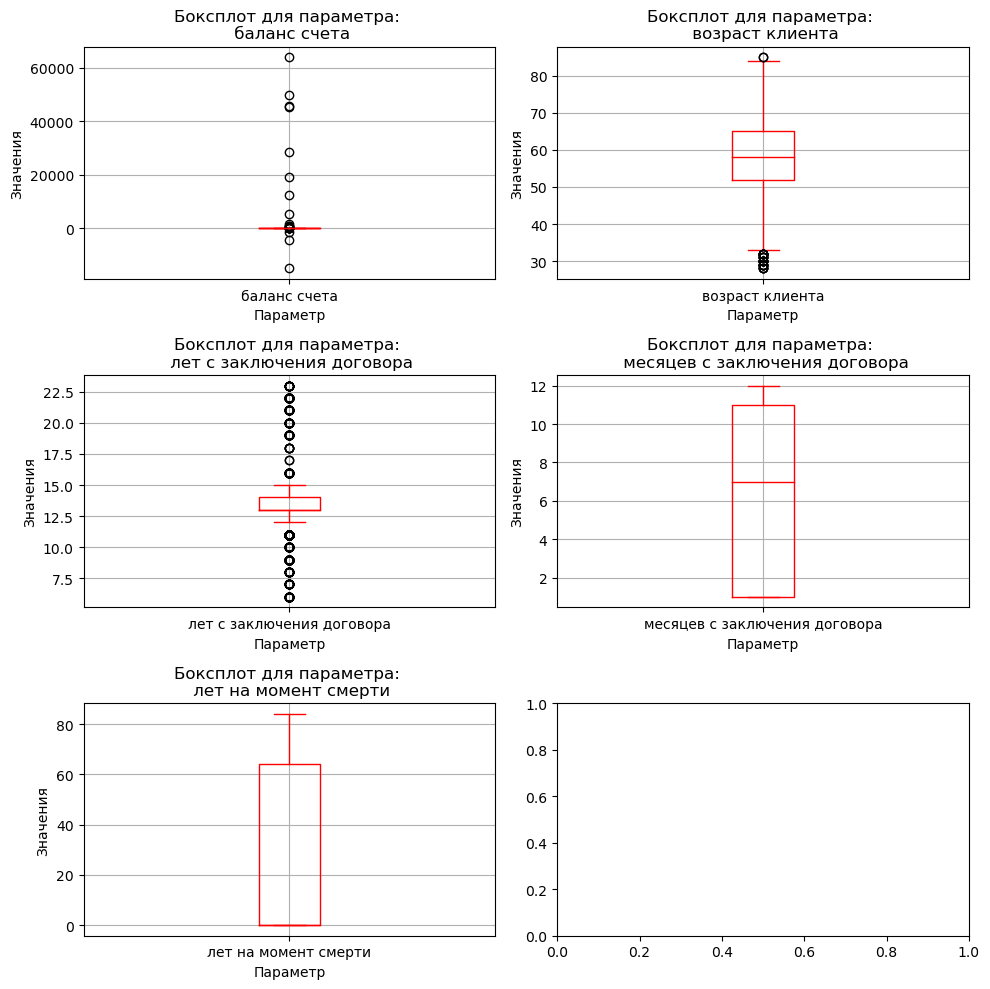

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

numeric_cols = df.select_dtypes(include=['number'])\
.drop(columns=['месяц рождения клиента', 'день рождения клиента',\
               'дней с заключения договора', 'месяцев на момент смерти', 'дней на момент смерти', 'тип выплаты', 'месяц выплаты']).columns

for i, numeric_col in enumerate(numeric_cols):
    ax = axes[i]
    df.boxplot(column=numeric_col, ax=ax, color='red')
    
    ax.set_xlabel('Параметр')
    ax.set_ylabel('Значения')
    ax.set_title(f'Боксплот для параметра: \n {numeric_col}')
plt.tight_layout()
plt.show()

Баланс счета различен: в среднем это 0 рублей, у некоторых клиентов достигает 60000

Средний возраст клиентов 60 лет

Среднее время с заключения договора 13 лет

Сумма выплаты находится в пределах 100000 руб в основном

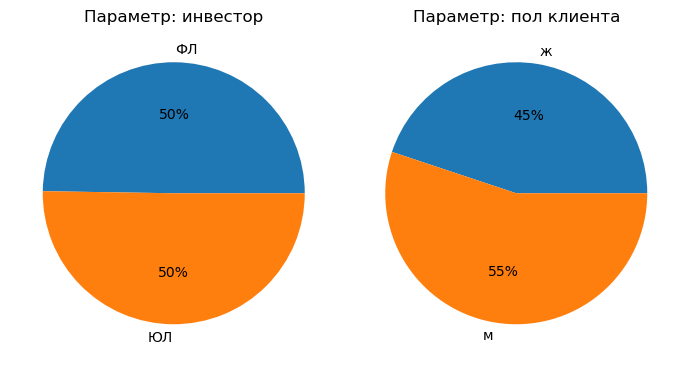

In [20]:

fig, axs = plt.subplots(1, 2, figsize=(7, 7))
axs = axs.flatten()

features = df.select_dtypes(include=['object']).columns

for i, feature in enumerate(features):
    df.pivot_table(index=feature, values='баланс счета', aggfunc='count').plot(
        kind='pie',
        figsize=(5, 5),
        grid=False,
        title=None,
        subplots=True,
        autopct='%.0f%%',
        ax=axs[i]  
    )
    axs[i].set_ylabel(None)
    axs[i].set_title(f'Параметр: {feature}')
    axs[i].get_legend().remove()

    
plt.tight_layout()
plt.show()



Дисбаланса классов - преимущества женщины или мужчина, равно как преимущества Юрлиц или Физлиц не наблюдается

## Подготовка данных и обучение моделей

In [21]:

features = ['инвестор', 'пол клиента', 'баланс счета', 'возраст клиента', 
            'лет с заключения договора', 'месяцев с заключения договора','лет на момент смерти']

targets = ['месяц выплаты', 'тип выплаты']

# Разбиваем данные на тренировочный и тестовый набор
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_df[features]
y_train = train_df[targets]

X_val = val_df[features]
y_val = val_df[targets]

cat_features = ['инвестор', 'пол клиента']
num_features = ['баланс счета', 'возраст клиента', 
            'лет с заключения договора', 'месяцев с заключения договора','лет на момент смерти']

cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_train = cat_encoder.fit_transform(X_train[cat_features])
X_cat_val = cat_encoder.transform(X_val[cat_features])

num_scaler = StandardScaler()
X_num_train = num_scaler.fit_transform(X_train[num_features])
X_num_val = num_scaler.transform(X_val[num_features])

X_train_processed = np.hstack([X_cat_train, X_num_train])
X_val_processed = np.hstack([X_cat_val, X_num_val])

y_train_processed = y_train.values
y_val_processed = y_val.values

In [22]:
X_train

,инвестор,пол клиента,баланс счета,возраст клиента,лет с заключения договора,месяцев с заключения договора,лет на момент смерти
3414,ФЛ,м,0.0,52,12,12,0
1499,ЮЛ,ж,0.0,56,13,12,0
4003,ФЛ,ж,0.0,52,13,11,0
3866,ФЛ,ж,0.0,55,13,5,0
422,ФЛ,м,0.0,72,13,1,72
...,...,...,...,...,...,...,...
4426,ЮЛ,ж,0.0,44,13,1,0
466,ФЛ,м,0.0,61,14,8,0
3092,ФЛ,м,0.0,58,12,12,0
3772,ФЛ,ж,0.0,40,13,8,0


In [23]:
y_train_month = to_categorical(y_train['месяц выплаты'] - 1, num_classes=12)
y_train_type = to_categorical(y_train['тип выплаты'] - 1, num_classes=3)

y_val_month = to_categorical(y_val['месяц выплаты'] - 1, num_classes=12)
y_val_type = to_categorical(y_val['тип выплаты'] - 1, num_classes=3)

     
inputs = Input(shape=(X_train_processed.shape[1],))

x = Dense(256, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

month_output = Dense(12, activation='softmax', name='month_output')(x)  
type_output = Dense(3, activation='softmax', name='type_output')(x) 
model = Model(inputs=inputs, outputs=[month_output, type_output])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss={'month_output': 'categorical_crossentropy',
                    'type_output': 'categorical_crossentropy'},
              metrics={'month_output': 'accuracy',
                       'type_output': 'accuracy'})

es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_processed, 
                    {'month_output': y_train_month,
                
                     'type_output': y_train_type},
                    validation_data=(X_val_processed, 
                                     {'month_output': y_val_month, 
                                      
                                      'type_output': y_val_type}),
                    epochs=100,
                    batch_size=32,
                    callbacks=[es_callback],
                    verbose=1)

display(model.summary())

Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 2.6946 - month_output_loss: 2.2939 - type_output_loss: 0.4007 - month_output_accuracy: 0.2527 - type_output_accuracy: 0.8543 - val_loss: 2.6241 - val_month_output_loss: 2.3147 - val_type_output_loss: 0.3093 - val_month_output_accuracy: 0.2550 - val_type_output_accuracy: 0.8665
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 2.5037 - month_output_loss: 2.2321 - type_output_loss: 0.2716 - month_output_accuracy: 0.2673 - type_output_accuracy: 0.8817 - val_loss: 2.5738 - val_month_output_loss: 2.3036 - val_type_output_loss: 0.2702 - val_month_output_accuracy: 0.2550 - val_type_output_accuracy: 0.8785
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 2.4601 - month_output_loss: 2.2073 - type_output_loss: 0.2528 - month_output_accuracy: 0.2680 - type_output_accuracy: 0.8882 - val_loss: 2.5541 - val_month_output_loss: 2.2935 - val_type_output_loss: 0.2606 - val_month_

None

## Применение модели для предсказания типа выплаты и месяца выплаты

Подготовка данных для модели:

In [24]:
X_test = df_val[features]
X_cat_test = cat_encoder.transform(X_test[cat_features])
X_num_test = num_scaler.transform(X_test[num_features])
X_test_processed = np.hstack([X_cat_test, X_num_test])

y_train_processed = y_train.values
y_val_processed = y_val.values

In [25]:
X_test

,инвестор,пол клиента,баланс счета,возраст клиента,лет с заключения договора,месяцев с заключения договора,лет на момент смерти
0,ФЛ,ж,0.0,63,16,12,0
1,ЮЛ,ж,0.0,74,15,1,0
2,ЮЛ,м,0.0,56,15,1,0
3,ЮЛ,м,0.0,74,16,10,0
4,ФЛ,ж,0.0,78,23,4,0
...,...,...,...,...,...,...,...
293519,ЮЛ,ж,NaN,55,15,1,0
293520,ЮЛ,ж,0.0,65,17,12,0
293521,ЮЛ,ж,0.0,63,15,1,0
293522,ФЛ,ж,0.0,62,15,5,0


Предсказание

In [26]:
pred = model.predict(X_test_processed)

9173/9173 [==============================] - 13s 1ms/step


Приведение данных в первоначальную размерность (месяцы и тип выплаты)

In [27]:
pred_month = np.argmax(pred[0], axis=1) + 1  
pred_type = np.argmax(pred[1], axis=1) + 1    



## Предсказание суммы выплаты

Подготовка данных и загрузка данных

In [28]:
data_x_train = pd.read_csv('x_train.csv', encoding='windows-1251', sep=';')
data_y_train =  pd.read_csv('y_train.csv', encoding='windows-1251', sep=';')
df = data_x_train.join(data_y_train)
df['баланс счета'] = pd.to_numeric(df['баланс счета'], errors='coerce')
df['сумма выплаты'] = pd.to_numeric(df['сумма выплаты'], errors='coerce')
df = df.fillna(0)
df[['инвестор', 'пол клиента']] = df[['инвестор', 'пол клиента']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   инвестор                       4977 non-null   category
 1   пол клиента                    4977 non-null   category
 2   баланс счета                   4977 non-null   float64 
 3   возраст клиента                4977 non-null   int64   
 4   месяц рождения клиента         4977 non-null   int64   
 5   день рождения клиента          4977 non-null   int64   
 6   лет с заключения договора      4977 non-null   int64   
 7   месяцев с заключения договора  4977 non-null   int64   
 8   дней с заключения договора     4977 non-null   int64   
 9   лет на момент смерти           4977 non-null   int64   
 10  месяцев на момент смерти       4977 non-null   int64   
 11  дней на момент смерти          4977 non-null   int64   
 12  месяц выплаты                  497

Разбиение на обучающую и валидационную выборки, удалим лишние признаки, избыточными признаками скорее всего будут являться:

'месяц рождения клиента', 'день рождения клиента','месяцев с заключения договора', 'дней с заключения договора', 'дней на момент смерти'

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['сумма выплаты', 'месяц выплаты', 'тип выплаты', 'месяц рождения клиента', 'день рождения клиента',\
             'месяцев с заключения договора', 'дней с заключения договора', 'дней на момент смерти'], axis=1),
    df['сумма выплаты'],
    test_size = 0.2, 
    random_state = 42)

X_train.columns

Index(['инвестор', 'пол клиента', 'баланс счета', 'возраст клиента',
       'лет с заключения договора', 'лет на момент смерти',
       'месяцев на момент смерти'],
      dtype='object')

Закодируем признаки и мастабируем численные признаки

In [30]:
ohe_columns = ['инвестор', 'пол клиента']
num_columns = ['баланс счета', 'возраст клиента',
       'лет с заключения договора', 'лет на момент смерти',
       'месяцев на момент смерти'] 

Построим пайплайн для нескольких моделей, включая тензорные исчисления.

In [31]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough')

def create_model():
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    output = Dense(1)(x)  # Регрессия, выход с одним нейроном
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model


In [32]:

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=42))
])

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(4, 7),
        'models__max_features': range(5, 7),  
        'preprocessor__num': [StandardScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), 'passthrough'],
    },
    {
        'models': [lgb.LGBMRegressor(random_state=42)],
        'models__num_leaves': [31, 50],
        'models__learning_rate': [0.01, 0.1],  
        'preprocessor__num': [StandardScaler(), 'passthrough'],
    },
    {
        'models': [KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)],
        'preprocessor__num': [StandardScaler(), 'passthrough'],
    }
]


Используем метрику RMSE

In [33]:
random_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    n_iter=22, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['инвестор', 'пол клиента']),
                                                 ('num', Stand

In [34]:
y_pred = random_search.predict(X_test)

print(f'Метрика RMSE на тестовой выборке: {np.sqrt(mean_squared_error(y_test, y_pred))}')



Метрика RMSE на тестовой выборке: 2650.2190749735755


Метрика RMSE на тестовой выборке: 2630.674103757906. RMSE дает ошибку 2630 руб. в выплате, для подбора более оптимальных значений следует обратиться к заказчику модели, спросив его, какой результат для него более приемлем.

Используя обученную модель предскажем сумму, и оформим все в единый датафрейм.

In [35]:
X_val = df_val

pred_sum = random_search.predict(X_val)

In [36]:
predictions_df = pd.DataFrame({
    'predicted_month': pred_month,
    'predicted_type': pred_type,
    'predicted_sum': pred_sum
})


In [40]:
predictions_df.head()

,predicted_month,predicted_type,predicted_sum
0,4,1,1225.148071
1,3,1,641.450745
2,3,2,3256.002686
3,1,1,1733.249268
4,3,1,1494.222412


## Анализ предсказаний

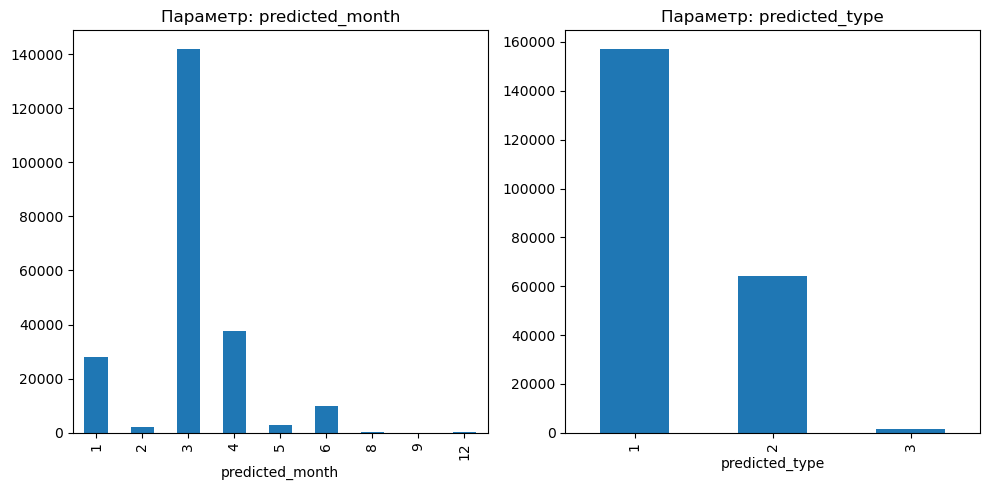

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

features = ['predicted_month', 'predicted_type']

for i, feature in enumerate(features):
    predictions_df.pivot_table(index=feature, values='predicted_sum', aggfunc='count').plot(
        kind='bar',
        figsize=(5, 5),
        grid=False,
        title=None,
        subplots=True,
        
        ax=axs[i]  
    )
    axs[i].set_ylabel(None)
    axs[i].set_title(f'Параметр: {feature}')
    axs[i].get_legend().remove()

    
plt.tight_layout()
plt.show()

Предсказания модели утверждают, что чаще всего страховую выплату получают в марте и по типу выплаты 1.

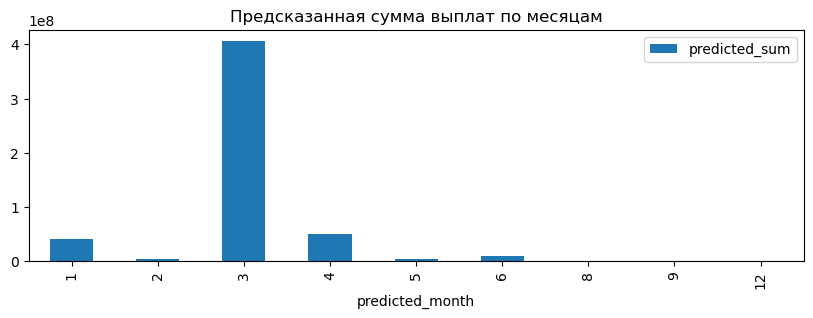

In [53]:
predictions_df.pivot_table(index='predicted_month', values='predicted_sum', aggfunc='sum').plot(kind='bar',
    figsize=(10,3),
        grid=False,
        title='Предсказанная сумма выплат по месяцам');
        

По предсказаниям модели выплаты в марте составят 400 000 000 рублей выглядит высокой, но на 150 000 человек (или юрлиц) это 2666 руб.  рублей на каждого.

## Общие выводы

1. В ходе реализации проекта были обработаны пропуски в данных, произведен исследовательский анализ данных, который выявил отстутсвие полового и юридического дисбаланса между клиентами.

2. Была обучена нейросеть, которая по совокупности входных признаков предсказывает месяц выплаты и тип выплаты

3. Отдельно выделено обучение и применение модели для прогнозирования суммы выплаты

4. По результатам обзора предсказанных значений самым "горячим" месяцем оказался март, средняя сумма выплаты составила 2666 руб.